<a href="https://colab.research.google.com/github/kkkonts/coursera-matstat-AB/blob/main/hw01_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами. Делать это задание необязательно, но рекомендуется.

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')  # стиль для графиков
%matplotlib inline

## Упражнение 1

> Нормальность восстановлена, мы на орбите Магратеи (Автостопом по галактике)

__а)__ Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$.

In [3]:
norm_rv = sts.norm(loc=4, scale=10)
norm_rv.rvs(10)

array([ 11.10444055,   3.89809211,   5.21187274, -15.78831993,
         5.8318087 ,   2.64309131,  -8.21545091, -16.02743108,
         6.11579943,   8.86823135])

__б)__ Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`.

In [4]:
p1 = 1 - norm_rv.cdf(4)
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)


In [5]:
# Проверка корректно ли вы нашли вероятности :)
# Задание необязательное, поэтому все тесты открытые

assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5

__в)__ Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [6]:
a = norm_rv.ppf(0.7)

In [7]:
assert np.abs(a - 9.2440051) < 1e-5

__г)__ Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [8]:
b = 4 - norm_rv.ppf(0.25)

In [9]:
assert np.abs(b - 6.7448975) < 1e-5

__д)__ Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины.

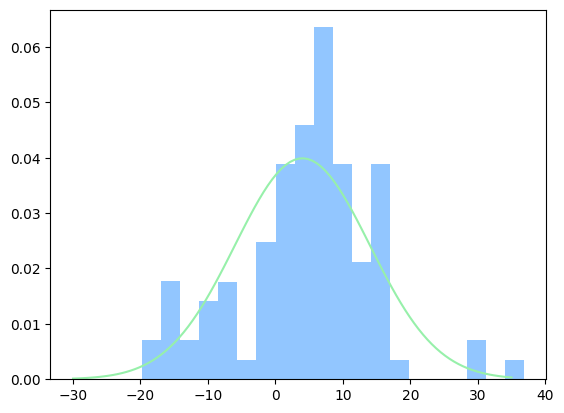

In [13]:
sample = norm_rv.rvs(100)
x = np.linspace(-30, 35, 100)
plt.hist(sample, bins=20, density=True)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

__е)__ Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике.

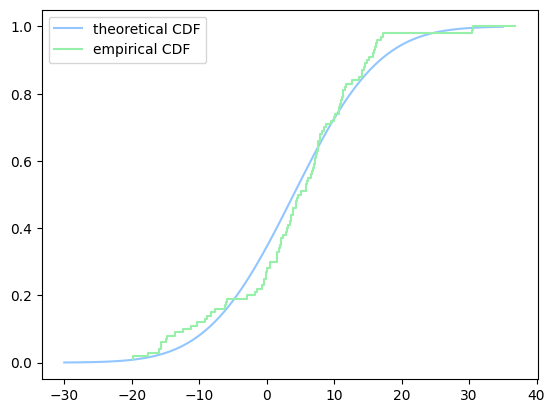

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF

# теоретическа cdf
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.legend(loc='upper left');

## Упражнение 2

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам. (Дайте танк)

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [21]:
poisson_rv = sts.poisson(mu=3)
p = poisson_rv.sf(4)
p


0.18473675547622787

In [22]:
assert np.abs(p - 0.1847367) < 1e-5

## Упражнение 3

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [23]:
binom_rv = sts.binom(n=14, p=0.5)

p = binom_rv.pmf(12)
p


0.005554199218750009

In [24]:
assert np.abs(p - 0.0055541) < 1e-5

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат?

In [25]:
binom_rv = sts.binom(n=14, p=0.9)

p = binom_rv.pmf(12)
p

0.25701087819770996

In [26]:
assert np.abs(p - 0.2570108) < 1e-5